In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
# For text analysis
from nltk.tokenize import sent_tokenize, word_tokenize   
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Word embeddings
import gensim 
from gensim.models import Word2Vec
# Statistics and model related
from statistics import mode, StatisticsError
import random 
from sklearn import preprocessing
from sklearn.utils import resample
# Model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristenboyle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Read tips dataset
df_tip = pd.read_csv('/Users/kristenboyle/Downloads/yelp_dataset/tip.csv')
# Load ratings, stars, etc. for businesses
df_business = pd.read_csv('/Users/kristenboyle/Downloads/yelp_dataset/business.csv')
# Food inspection data
df_inspection = pd.read_csv('/Users/kristenboyle/Downloads/restaurant-inspections-1.csv')

/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,32,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# Functions
def pick_one(input_list):
    x = random.choice(input_list)
    return x

# Find the length of a list in the df row
def get_len(x):
    y = len(x)
    return y

# The below function removes the stop words and tokenize a sentence
def preprocess(text):
    tokens = gensim.utils.simple_preprocess(text)
    stop_words = stopwords.words('english')
    return [tok for tok in tokens if tok not in stop_words]

# Finds the mode in the list, if there is tie pick random
def find_mode(input_list):
    try: 
        x = mode(input_list)
    except StatisticsError: # If the list is bimodal, then take a random element. Justification: add noise
        x = random.choice(input_list)
    return x

In [10]:
# Combine all the tips for each business
df_tip2 = df_tip.groupby('business_id').agg(lambda x: x.tolist()) 
# Convert each row (list of tips) for "text" column to a single string separated by ";"
df_tip2['text_all'] = df_tip2['text'].str.join(';')
# count the number of tips for each business
df_tip2['tips_count'] = df_tip2['compliment_count'].apply(get_len)
df_tip2.head(3)

,compliment_count,date,user_id,text,text_all,tips_count
business_id,,,,,,
--1UhMGODdWsrMastO9DZw,[0],[2017-07-26 17:26:25],[4YHZzwlxEMi7zWO6Osszdw],"[Delicious! One of the best burritos, salsa an...","Delicious! One of the best burritos, salsa and...",1
--6MefnULPED_I942VcFNA,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2013-03-24 01:12:20, 2014-07-11 15:48:40, 201...","[EiP1OFgs-XGcKZux0OKWIA, 2oMkzQcRL7-d7URt3Xo_X...","[BBQ pork is sold out early on Saturday, $5 lu...",BBQ pork is sold out early on Saturday;$5 lunc...,14
--7zmmkVg-IMGaXbuVd0SQ,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2017-08-17 20:35:18, 2015-02-27 23:35:49, 201...","[Z7pFsGpIyLzMTZsXjTFF1A, Zqhl8pDShvMr2Vt1mIGC4...","[Good place to stop when traffic don't go., Fl...",Good place to stop when traffic don't go.;Flig...,11
--9QQLMTbFzLJ_oT-ON3Xw,"[0, 0]","[2016-08-27 17:35:41, 2017-02-05 19:07:14]","[mfdb2wCYv7yiu0fyzFKMBg, mfdb2wCYv7yiu0fyzFKMBg]",[Tip? Don't get your hair cut here. If they're...,Tip? Don't get your hair cut here. If they're ...,2
--9e1ONYQuAa-CB_Rrw7Tw,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2014-06-27 01:37:27, 2016-12-19 00:29:11, 201...","[LgFDWZTLi1w9OGi5BtKORg, q-v8elVPvKz0KvK69QSj1...","[Wine pairings for my prix fixe meal. Mmmm, *...",Wine pairings for my prix fixe meal. Mmmm;*Cu...,160


In [13]:
# Clean and tokenize
df_tip2 = df_tip2.dropna() # Remove NaNs
desired_series = df_tip2.text_all.tolist()
series_token = [preprocess(sentence) for sentence in desired_series] # Function: preprocess
df_tip2['text_clean'] = series_token # Create a series with tokens
df_tip2['text_clean'].head(3)

business_id
--1UhMGODdWsrMastO9DZw    [delicious, one, best, burritos, salsa, vegeta...
--6MefnULPED_I942VcFNA    [bbq, pork, sold, early, saturday, lunch, spec...
--7zmmkVg-IMGaXbuVd0SQ    [good, place, stop, traffic, go, flights, beer...
Name: text_clean, dtype: object

In [14]:
# Not using word2vec anymore
## Word2vec model
#model = Word2Vec(df_tip2['text_clean'], size=50, window=5, min_count=1, workers=4)
#model.save("word2vec.model")
## Predict the similarity between words based on the Word2vec model
#print("Cosine similarity between 'roach' " + "and 'bug': ", 
#      model.similarity('roach', 'clean'))

In [15]:
# df_business: separate businesses in Las Vegas from other cities
df_business1 = df_business[df_business['city'] == "Las Vegas"]
df_business1.columns

Index(['attributes.AgesAllowed', 'hours.Thursday', 'attributes.CoatCheck',
       'attributes.BusinessParking', 'attributes.GoodForMeal',
       'attributes.Alcohol', 'attributes.RestaurantsTableService',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsDelivery',
       'attributes.Music', 'hours.Wednesday', 'attributes.Ambience',
       'attributes.HasTV', 'address', 'review_count',
       'attributes.RestaurantsPriceRange2', 'attributes.HairSpecializesIn',
       'attributes.RestaurantsCounterService', 'attributes.BestNights',
       'business_id', 'attributes.DietaryRestrictions',
       'attributes.RestaurantsReservations', 'categories', 'latitude',
       'attributes.Corkage', 'attributes.BusinessAcceptsBitcoin',
       'attributes.OutdoorSeating', 'hours.Tuesday', 'attributes.Smoking',
       'attributes.Caters', 'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsAttire', 'attributes.Open24Hours', 'name',
       'attributes.WheelchairAccessible'

In [16]:
# Create a new df_business with only a subset of features
df_business2 = df_business1.loc[:, ['business_id', 'name', 'stars', 'review_count', 'categories', 
                                    'attributes.RestaurantsPriceRange2', 'address'] ]
df_business2 = df_business2.dropna() # Remove NaNs
df_business2.head(3)

,business_id,name,stars,review_count,categories,attributes.RestaurantsPriceRange2,address
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,3.5,3,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",3,"4545 E Tropicana Rd Ste 8, Tropicana"
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,4.0,40,"Restaurants, Italian",2,"1775 E Tropicana Ave, Ste 29"
22,KWywu2tTEPWmR9JnBc0WyQ,Hunk Mansion,4.0,107,"Nightlife, Arts & Entertainment, Bars, Strip C...",2,6007 Dean Martin Dr


In [18]:
# Includes businesses if "Restaurants" exist in the "categoris" column
df_business3 = df_business2[df_business2['categories'].str.contains('Restaurants')]
# Clean the restaurant names
df_business3['name'] = df_business3.loc[:,'name'].str.lower()
df_business3.head(3)

/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,business_id,name,stars,review_count,categories,attributes.RestaurantsPriceRange2,address
17,PZ-LZzSlhSe9utkQYU8pFg,carluccio's tivoli gardens,4.0,40,"Restaurants, Italian",2,"1775 E Tropicana Ave, Ste 29"
25,tstimHoMcYbkSC4eBA1wEg,maria's mexican restaurant & bakery,4.5,184,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",1,6055 E Lake Mead Blvd
75,kANF0dbeoW34s2vwh6Umfw,dairy queen,2.0,33,"Fast Food, Food, Restaurants, Ice Cream & Froz...",1,6125 Spring Mountain Rd


In [19]:
# Food inspection data
# Separate inspection grade based on year
df_inspection_2017 = df_inspection[df_inspection['Record Updated'].str.contains('2017')]
df_inspection_2016 = df_inspection[df_inspection['Record Updated'].str.contains('2016')]
df_inspection_2015 = df_inspection[df_inspection['Record Updated'].str.contains('2015')]
df_inspection_2014 = df_inspection[df_inspection['Record Updated'].str.contains('2014')]
df_inspection_2013 = df_inspection[df_inspection['Record Updated'].str.contains('2013')]
df_inspection_2012 = df_inspection[df_inspection['Record Updated'].str.contains('2012')]

In [25]:
# Check the number of observations per year
#df_inspection_2017.shape # (18035, 23)
#df_inspection_2016.shape # (19880, 23)
#df_inspection_2015.shape # (21582, 23)
#df_inspection_2014.shape # (20061, 23)
#df_inspection_2013.shape # (68681, 23)
df_inspection_2012.shape # (39, 23)

(39, 23)

In [26]:
# Combine all the inspection throughtout the year
df_inspection_2017vr2 = df_inspection_2017.groupby('Address').agg(lambda x: x.tolist()) 
df_inspection_2016vr2 = df_inspection_2016.groupby('Address').agg(lambda x: x.tolist()) 
df_inspection_2015vr2 = df_inspection_2015.groupby('Address').agg(lambda x: x.tolist()) 
df_inspection_2014vr2 = df_inspection_2014.groupby('Address').agg(lambda x: x.tolist()) 
df_inspection_2013vr2 = df_inspection_2013.groupby('Address').agg(lambda x: x.tolist()) 

In [ ]:
# Find mode for each 
df_inspection_2017vr2['mode'] = df_inspection_2017vr2['Inspection Grade'].apply(find_mode)
df_inspection_2016vr2['mode'] = df_inspection_2016vr2['Inspection Grade'].apply(find_mode)
df_inspection_2015vr2['mode'] = df_inspection_2015vr2['Inspection Grade'].apply(find_mode)
df_inspection_2014vr2['mode'] = df_inspection_2014vr2['Inspection Grade'].apply(find_mode)
df_inspection_2013vr2['mode'] = df_inspection_2013vr2['Inspection Grade'].apply(find_mode)

(18035, 23)

In [106]:
# Index is based on address, make it a column too
df_inspection_2017vr2['address'] = df_inspection_2017vr2.index
df_inspection_2016vr2['address'] = df_inspection_2016vr2.index
df_inspection_2015vr2['address'] = df_inspection_2015vr2.index
df_inspection_2014vr2['address'] = df_inspection_2014vr2.index
df_inspection_2013vr2['address'] = df_inspection_2013vr2.index
df_inspection_2017vr2.columns

Index(['Serial Number', 'Permit Number', 'Restaurant Name', 'Location Name',
       'Category Name', 'City', 'State', 'Zip', 'Current Demerits',
       'Current Grade', 'Date Current', 'Inspection Date', 'Inspection Time',
       'Employee ID', 'Inspection Type', 'Inspection Demerits',
       'Inspection Grade', 'Permit Status', 'Inspection Result', 'Violations',
       'Record Updated', 'Location 1', 'mode', 'address'],
      dtype='object')

In [107]:
# Take a  subset of columns 
df_inspection_2017vr3 = df_inspection_2017vr2.loc[:, ['Restaurant Name', 'mode', 'address']]
df_inspection_2016vr3 = df_inspection_2016vr2.loc[:, ['Restaurant Name', 'mode', 'address']]
df_inspection_2015vr3 = df_inspection_2015vr2.loc[:, ['Restaurant Name', 'mode', 'address']]
df_inspection_2014vr3 = df_inspection_2014vr2.loc[:, ['Restaurant Name', 'mode', 'address']]
df_inspection_2013vr3 = df_inspection_2013vr2.loc[:, ['Restaurant Name', 'mode', 'address']]



# "Restaurant Name" is a list, pick one name (the list presumably is made of the same name)
df_inspection_2017vr3['Restaurant Name'] = df_inspection_2017vr3['Restaurant Name'].apply(pick_one)
df_inspection_2016vr3['Restaurant Name'] = df_inspection_2016vr3['Restaurant Name'].apply(pick_one)
df_inspection_2015vr3['Restaurant Name'] = df_inspection_2015vr3['Restaurant Name'].apply(pick_one)
df_inspection_2014vr3['Restaurant Name'] = df_inspection_2014vr3['Restaurant Name'].apply(pick_one)
df_inspection_2013vr3['Restaurant Name'] = df_inspection_2013vr3['Restaurant Name'].apply(pick_one)

In [109]:
df_inspection_2016vr3.head()

,Restaurant Name,mode,address
Address,,,
#1 Main St,Gold Strike New Steak House,A,#1 Main St
1 Bonnie Springs Rd,Bonnie Springs Ranch Restaurant,A,1 Bonnie Springs Rd
1 Cascata Way,Cascata Golf Club Restaurant,A,1 Cascata Way
1 Club Side Dr,Anthem Country Club Snack Bar,A,1 Club Side Dr
1 Clubhouse Dr,Tony's Pro Shop Bar,A,1 Clubhouse Dr


In [115]:
# Merge inspection from each year
df_inspection_year = pd.merge(df_inspection_2017vr3, df_inspection_2016vr3, on = 'address')

In [117]:
df_inspection_year = df_inspection_year.drop(columns=['Restaurant Name_y'])
df_inspection_year = df_inspection_year.rename(columns={"Restaurant Name_x": "name", "mode_x": "2017", 
                                                        "mode_y": "2016"})


,name,2017,address,2016
0,Gold Strike Main Bar - Stage Bar,A,#1 Main St,A
1,Bonnie Springs Saloon,A,1 Bonnie Springs Rd,A
2,Cascata Golf Course Cart #2,A,1 Cascata Way,A
3,Anthem Country Club Clubhouse Restaurant,A,1 Club Side Dr,A
4,Tony's Pro Shop 15th Snack Shack,A,1 Clubhouse Dr,A


In [145]:
df_inspection_year_2 = pd.merge(df_inspection_year, df_inspection_2015vr3, on = 'address')
df_inspection_year_2.head()

,name,2017,address,2016,Restaurant Name,mode
0,Gold Strike Main Bar - Stage Bar,A,#1 Main St,A,Gold Strike Steakhouse Service Bar,A
1,Bonnie Springs Saloon,A,1 Bonnie Springs Rd,A,BONNIE SPRINGS SALOON SUPP KITCHEN,A
2,Cascata Golf Course Cart #2,A,1 Cascata Way,A,Cascata Golf Club Bar,A
3,Anthem Country Club Clubhouse Restaurant,A,1 Club Side Dr,A,Anthem Country Club Clubhouse Restaurant,A
4,Tony's Pro Shop 15th Snack Shack,A,1 Clubhouse Dr,A,Tony's Pro Shop Snack Bar,A


In [146]:
df_inspection_year_2 = df_inspection_year_2.drop(columns=['Restaurant Name'])
df_inspection_year_2 = df_inspection_year_2.rename(columns={"mode": "2015"})
df_inspection_year_2.head()

,name,2017,address,2016,2015
0,Gold Strike Main Bar - Stage Bar,A,#1 Main St,A,A
1,Bonnie Springs Saloon,A,1 Bonnie Springs Rd,A,A
2,Cascata Golf Course Cart #2,A,1 Cascata Way,A,A
3,Anthem Country Club Clubhouse Restaurant,A,1 Club Side Dr,A,A
4,Tony's Pro Shop 15th Snack Shack,A,1 Clubhouse Dr,A,A


In [147]:
df_inspection_year_3 = pd.merge(df_inspection_year_2, df_inspection_2014vr3, on = 'address')
df_inspection_year_3 = df_inspection_year_3.drop(columns=['Restaurant Name'])
df_inspection_year_3 = df_inspection_year_3.rename(columns={"mode": "2014"})
df_inspection_year_3.head()

,name,2017,address,2016,2015,2014
0,Gold Strike Main Bar - Stage Bar,A,#1 Main St,A,A,A
1,Bonnie Springs Saloon,A,1 Bonnie Springs Rd,A,A,A
2,Cascata Golf Course Cart #2,A,1 Cascata Way,A,A,A
3,Anthem Country Club Clubhouse Restaurant,A,1 Club Side Dr,A,A,A
4,Tony's Pro Shop 15th Snack Shack,A,1 Clubhouse Dr,A,A,A


In [564]:
df_inspection_year_4 = pd.merge(df_inspection_year_3, df_inspection_2013vr3, on = 'address')
df_inspection_year_4 = df_inspection_year_4.drop(columns=['Restaurant Name'])
df_inspection_year_4 = df_inspection_year_4.rename(columns={"mode": "2013"})
df_inspection_year_4.head()

,name,2017,address,2016,2015,2014,2013
0,gold strike main bar - stage bar,A,#1 Main St,A,A,A,A
1,bonnie springs saloon,A,1 Bonnie Springs Rd,A,A,A,A
2,cascata golf course cart #2,A,1 Cascata Way,A,A,A,A
3,anthem country club clubhouse restaurant,A,1 Club Side Dr,A,A,A,A
4,tony's pro shop 15th snack shack,A,1 Clubhouse Dr,A,A,A,A


In [159]:
# Join business dataset with df_tip2
#df_business3
#df_tip2['text_clean']
df_customer = pd.merge(df_tip2, df_business3, on = 'business_id')
df_customer.columns

Index(['business_id', 'compliment_count', 'date', 'user_id', 'text',
       'text_all', 'text_clean', 'name', 'stars', 'review_count', 'categories',
       'attributes.RestaurantsPriceRange2', 'address'],
      dtype='object')

In [160]:
# Join df_customer with df_inspection_year_4
df_inspection_year_4['name'] = df_inspection_year_4['name'].str.lower()
df_customer['name'] = df_customer['name'].str.lower()
df_all = pd.merge(df_inspection_year_4, df_customer, on = 'name')

In [161]:
df_all.shape

(4002, 19)

In [164]:
df_all.shape

(4002, 19)

In [163]:
df_all.columns

Index(['name', '2017', 'address_x', '2016', '2015', '2014', '2013',
       'business_id', 'compliment_count', 'date', 'user_id', 'text',
       'text_all', 'text_clean', 'stars', 'review_count', 'categories',
       'attributes.RestaurantsPriceRange2', 'address_y'],
      dtype='object')

In [577]:
# Word2vec model
#model = Word2Vec(df_all['text_clean'], size = 100, window=5, min_count=1, workers=4)
#model.save("word2vec.model")
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4002 entries, 0 to 4001
Data columns (total 22 columns):
name                                 4002 non-null object
2017                                 4002 non-null object
address_x                            4002 non-null object
2016                                 4002 non-null object
2015                                 3763 non-null object
2014                                 3998 non-null object
2013                                 4001 non-null object
business_id                          4002 non-null object
compliment_count                     4002 non-null object
date                                 4002 non-null object
user_id                              4002 non-null object
text                                 4002 non-null object
text_all                             4002 non-null object
text_clean                           4002 non-null object
stars                                4002 non-null float64
review_count          

In [229]:
# Predict the similarity between words based on the Word2vec model
#print("Cosine similarity between '1st' " + "and '2nd': ", 
 #     model.n_similarity(['clean', 'apple'], ['food', 'clean']))

Cosine similarity between '1st' and '2nd':  0.859968637427287


/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
#df_temp = df_all[df_all['text_all'].str.contains('roaches')] 
#df_temp['text_all'].head(100)
#df_temp.to_csv('/Users/kristenboyle/Documents/food_project/check.csv')
df_all['text_clean'].head()

0    [stopped, lunch, older, lady, greeting, custom...
1    [charge, rice, lunch, buffet, monday, saturday...
2    [found, place, accident, good, food, service, ...
3    [drive, thru, yes, homeless, guy, hangs, drive...
4    [carne, asada, super, nachos, bizness, cent, c...
Name: text_clean, dtype: object

In [326]:
negative_words = pd.read_csv('/Users/kristenboyle/Documents/food_project/negative_words.csv', header = None)
negative_words_list = negative_words.iloc[:, 0].tolist()
negative_words_list[0:5]
df_negative = pd.DataFrame({'text_clean': [negative_words_list]})
df_negative

,text_clean
0,"[illness, nausea, vomit, vomitting, diarrhea, ..."


In [294]:
# Create series of text_all including the negative words (last row) to put it in the word2vec
df_text = df_all.loc[:,['text_clean', 'text_all']]
#text.columns = ['text_clean']
df_text.head()

,text_clean,text_all
0,"[stopped, lunch, older, lady, greeting, custom...","I stopped in here for lunch, but the older lad..."
1,"[charge, rice, lunch, buffet, monday, saturday...",They charge $2 for rice!;Lunch buffet Monday -...
2,"[found, place, accident, good, food, service, ...",Found this place by accident. Good food and se...
3,"[drive, thru, yes, homeless, guy, hangs, drive...",Has a drive thru! Yes! But there's a homeless ...
4,"[carne, asada, super, nachos, bizness, cent, c...",The carne asada super nachos.are the bizness!;...


In [296]:
# Add df_negative to the last row
#df_text.append(df_negative)
#type(df_text)


/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,text_all,text_clean
0,"I stopped in here for lunch, but the older lad...","[stopped, lunch, older, lady, greeting, custom..."
1,They charge $2 for rice!;Lunch buffet Monday -...,"[charge, rice, lunch, buffet, monday, saturday..."
2,Found this place by accident. Good food and se...,"[found, place, accident, good, food, service, ..."
3,Has a drive thru! Yes! But there's a homeless ...,"[drive, thru, yes, homeless, guy, hangs, drive..."
4,The carne asada super nachos.are the bizness!;...,"[carne, asada, super, nachos, bizness, cent, c..."
...,...,...
3998,Their Pumpkin Concretes has a slice of pumpkin...,"[pumpkin, concretes, slice, pumpkin, pie, blen..."
3999,Delicious food;Opening 1/24 in the former A&W/...,"[delicious, food, opening, former, long, john,..."
4000,1/2 lb Siopao and Mami is their specialty;Thei...,"[lb, siopao, mami, specialty, sago, gulaman, p..."
4001,A poor man's wingstop.;First timers;A little e...,"[poor, man, wingstop, first, timers, little, e..."


In [297]:
# Word2vec model
model = Word2Vec(df_text['text_clean'], size = 100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [313]:
# Predict the similarity between words based on the Word2vec model
print("Cosine similarity between '1st' " + "and '2nd': ", 
      model.similarity('apple', 'hot'))

Cosine similarity between '1st' and '2nd':  0.16348075254883457


/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [327]:
# check if the text_clean column has any of the negative words
def word_finder(x):
    result = [elem for elem in negative_words_list if(elem in x)]
    return result

df_all['negative_word'] = df_all['text_clean'].apply(word_finder)

In [329]:
df_all['negative_word'].tail(10)

3992                                    []
3993                                    []
3994                                [suck]
3995               [dirty, horrible, sick]
3996                         [dirty, sick]
3997    [fever, spider, gross, disgusting]
3998                            [horrible]
3999                                    []
4000                            [inedible]
4001                                    []
Name: negative_word, dtype: object

In [330]:
# Find the number of negative words based on the length of each row from 'negative_word'
def freq_finder(x):
    y = len(x)
    return y

df_all['negative_freq'] = df_all['negative_word'].apply(freq_finder)

In [340]:
df_all.loc[:, ['negative_word', 'negative_freq']].head()
df_all['negative_freq'].value_counts()

0     2161
1      901
2      545
3      186
4      140
5       27
6       23
7        6
10       5
8        5
13       2
9        1
Name: negative_freq, dtype: int64

In [341]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4002 entries, 0 to 4001
Data columns (total 21 columns):
name                                 4002 non-null object
2017                                 4002 non-null object
address_x                            4002 non-null object
2016                                 4002 non-null object
2015                                 3763 non-null object
2014                                 3998 non-null object
2013                                 4001 non-null object
business_id                          4002 non-null object
compliment_count                     4002 non-null object
date                                 4002 non-null object
user_id                              4002 non-null object
text                                 4002 non-null object
text_all                             4002 non-null object
text_clean                           4002 non-null object
stars                                4002 non-null float64
review_count          

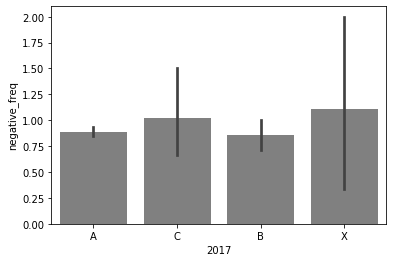

In [343]:

ax1 = sns.barplot(x = df_all["2017"], y = df_all["negative_freq"], color = 'grey')

In [352]:
df_all["negative_freq"].groupby(df_all["2017"]).mean()

2017
A    0.886413
B    0.855469
C    1.017544
X    1.111111
Name: negative_freq, dtype: float64

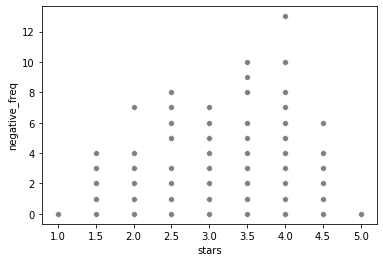

In [351]:
ax1 = sns.scatterplot(x = df_all["stars"], y = df_all["negative_freq"], color = 'grey')

In [355]:
df_all["2017"].value_counts() # 92% of the observations belong to A

A    3680
B     256
C      57
X       9
Name: 2017, dtype: int64

In [365]:
# Enode 2017 into: 0 for A; 1 for B, C and X
def label_to_numeric(x):
    if x == "A":
        y = 0
    else:
        y = 1
    return y
    
df_all['2017_code'] = df_all['2017'].apply(label_to_numeric)
df_all['2017_code'].value_counts()

0    3680
1     322
Name: 2017_code, dtype: int64

In [467]:
# Create predictor df
df_X = df_all.loc[:, ['stars', 'review_count', 'negative_freq', 'attributes.RestaurantsPriceRange2']]

le = preprocessing.LabelEncoder()
le.fit(df_X['attributes.RestaurantsPriceRange2'])
df_X['attributes.RestaurantsPriceRange2'] = le.transform(df_X['attributes.RestaurantsPriceRange2'])

In [509]:
df_X.columns = ['stars', 'review_count', 'negative_freq', 'price']
df_X.head()

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [469]:
# Response variable
df_y = df_all["2017_code"]

In [470]:
# Change df to np array

X = df_X
y = df_y.values

In [471]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)

model_log = LogisticRegression(C=1e5, solver='lbfgs').fit(X_train, y_train)
 
# Predict the test set
y_pred = model_log.predict(X_test)

# Mode accuracy
model_accuracy_logistic = 100 * accuracy_score(y_test, y_pred)
model_accuracy_logistic


93.9060939060939

In [428]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
# Predict the test set
y_pred = model_rf.predict(X_test)

# Mode accuracy
model_accuracy_rf = 100 * accuracy_score(y_test, y_pred)
model_accuracy_rf

91.5084915084915

In [429]:
from sklearn import neighbors
model_knn = neighbors.KNeighborsClassifier(10).fit(X_train, y_train)

# Predict the test set
y_pred = model_knn.predict(X_test)

# Mode accuracy
model_accuracy_knn = 100 * accuracy_score(y_test, y_pred)
model_accuracy_knn

91.9080919080919

In [472]:
# Oversampling minority class


X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state = 27)
# Concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
good = X[df_y == 0]
bad = X[df_y == 1]

# upsample minority
bad_upsampled = resample(bad, replace = True, # sample with replacement
                         n_samples = len(good), # match number in majority class
                         random_state = 27) # reproducible results

# Combine majority and upsampled minority
upsampled = pd.concat([good, bad_upsampled])
upsampled.head()

/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kristenboyle/anaconda3/envs/food_venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,stars,review_count,negative_freq,price,2017_code
965,2.5,86,1,0,0
538,4.0,17,1,0,0
2967,3.5,124,1,0,0
226,3.0,65,0,0,0
3476,4.0,56,0,0,0


In [475]:
X_train = upsampled.loc[:, ['stars', 'review_count', 'negative_freq', 'price']]
y_train = upsampled['2017_code']

model_log = LogisticRegression(C=1e5, solver='lbfgs').fit(X_train, y_train)
 
# Predict the test set
y_pred2 = model_log.predict(X_test)

# Mode accuracy
model_accuracy_logistic2 = 100 * accuracy_score(y_test, y_pred2)


import pickle
# saving
with open('model_logistic.pickle', 'wb') as handle:
    pickle.dump(model_log, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
model_accuracy_logistic2


61.038961038961034

In [432]:
upsampled['2017_code'].value_counts()

1    2740
0    2740
Name: 2017_code, dtype: int64

In [433]:

model_knn = neighbors.KNeighborsClassifier(10).fit(X_train, y_train)

# Predict the test set
y_pred2 = model_knn.predict(X_test)

# Mode accuracy
model_accuracy_knn2 = 100 * accuracy_score(y_test, y_pred2)
model_accuracy_knn2

62.637362637362635

In [434]:
model_rf = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
# Predict the test set
y_pred2 = model_rf.predict(X_test)

# Mode accuracy
model_accuracy_rf2 = 100 * accuracy_score(y_test, y_pred2)
model_accuracy_rf2

57.24275724275725

In [438]:
a  = y_test
a_good = a[a==0]
a_bad = a[a==1]
a_good.shape

(940,)

In [440]:
a_bad.shape

(61,)

In [447]:
X_test[0:5]

,stars,review_count,negative_freq,price
3019,2.5,51,0,0
642,2.5,151,2,0
1307,3.5,64,0,0
412,2.5,52,2,0
91,3.5,71,1,0


In [448]:
type(X_test)

pandas.core.frame.DataFrame

In [524]:
def label_to_label(x):
    if x == "A":
        y = 'Good'
    else:
        y = 'Bad'
    return y

Xy = pd.concat([df_X, df_all['2017']], axis=1)

Xy['2017'] = Xy['2017'].apply(label_to_label)
Xy.head()

,stars,review_count,negative_freq,price,price_uncode,2017
0,4.0,41,0,0,good,Good
1,4.5,103,2,0,good,Good
2,2.5,14,2,1,bad,Good
3,2.5,18,3,0,good,Good
4,4.0,9,0,0,good,Good


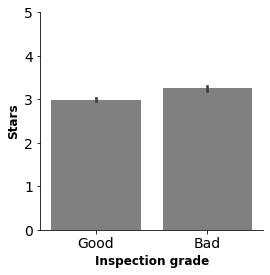

In [540]:
figsg, axsg = plt.subplots(figsize = (4,4))
axsg = sns.barplot(x = Xy["2017"], y = Xy["stars"], color = 'grey')
axsg.tick_params(axis="x", labelsize=14)
axsg.tick_params(axis="y", labelsize=14)
axsg.set_xlabel('Inspection grade', fontsize='large', fontweight='bold')
axsg.set_ylabel('Stars', fontsize='large', fontweight='bold')
axsg.set_ylim(0,5)
axsg.spines['right'].set_visible(False) 
axsg.spines['top'].set_visible(False)
plt.savefig('/Users/kristenboyle/Documents/food_project/pictures/stars_grade.png')

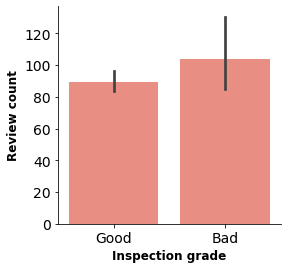

In [549]:
figrg, axrg = plt.subplots(figsize = (4,4))
axrg = sns.barplot(x = Xy["2017"], y = Xy["review_count"], color = 'salmon')
axrg.tick_params(axis="x", labelsize=14)
axrg.tick_params(axis="y", labelsize=14)
axrg.set_xlabel('Inspection grade', fontsize='large', fontweight='bold')
axrg.set_ylabel('Review count', fontsize='large', fontweight='bold')
#axrg.set_ylim(0,5)
axrg.spines['right'].set_visible(False) 
axrg.spines['top'].set_visible(False)
plt.savefig('/Users/kristenboyle/Documents/food_project/pictures/review_count_grade.png')

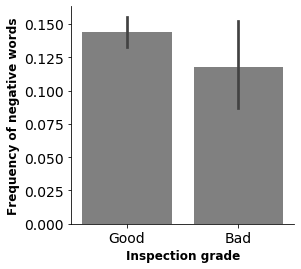

In [550]:
figng, axng = plt.subplots(figsize = (4,4))
axng = sns.barplot(x = Xy["2017"], y = Xy["negative_freq"], color = 'grey')
axng.tick_params(axis="x", labelsize=14)
axng.tick_params(axis="y", labelsize=14)
axng.set_xlabel('Inspection grade', fontsize='large', fontweight='bold')
axng.set_ylabel('Freq', fontsize='large', fontweight='bold')
#axrg.set_ylim(0,5)
axng.spines['right'].set_visible(False) 
axng.spines['top'].set_visible(False)
plt.savefig('/Users/kristenboyle/Documents/food_project/pictures/neg_freq_grade.png')

In [531]:
Xy.groupby('2017').mean()

,stars,review_count,negative_freq,price
2017,,,,
Bad,3.251553,103.906832,0.891304,0.118012
Good,2.993886,89.590761,0.886413,0.144022


In [553]:
Xy["price"] = Xy["price"]+1

In [554]:
Xy.groupby('2017').mean()

,stars,review_count,negative_freq,price
2017,,,,
Bad,3.251553,103.906832,0.891304,1.118012
Good,2.993886,89.590761,0.886413,1.144022


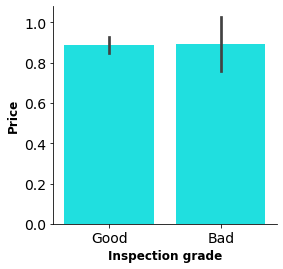

In [556]:
figpg, axpg = plt.subplots(figsize = (4,4))
axpg = sns.barplot(x = Xy["2017"], y = Xy["negative_freq"], color = 'cyan')
axpg.tick_params(axis="x", labelsize=14)
axpg.tick_params(axis="y", labelsize=14)
axpg.set_xlabel('Inspection grade', fontsize='large', fontweight='bold')
axpg.set_ylabel('Price', fontsize='large', fontweight='bold')
axrg.set_ylim(1,4)
axpg.spines['right'].set_visible(False) 
axpg.spines['top'].set_visible(False)
plt.savefig('/Users/kristenboyle/Documents/food_project/pictures/price_grade.png')

In [558]:
#negative_words_list


In [571]:
Xy["stars_to_review_count"] = Xy["stars"]/Xy["review_count"]
Xy["freq_to_review_count"] = Xy["negative_freq"]/Xy["review_count"]
Xy["price_to_review_count"] = Xy["price"]/Xy["review_count"]
Xy.head()

,stars,review_count,negative_freq,price,price_uncode,2017,stars_to_review_count,freq_to_review_count,price_to_review_count
0,4.0,41,0,1,good,Good,0.097561,0.000000,0.024390
1,4.5,103,2,1,good,Good,0.043689,0.019417,0.009709
2,2.5,14,2,2,bad,Good,0.178571,0.142857,0.142857
3,2.5,18,3,1,good,Good,0.138889,0.166667,0.055556
4,4.0,9,0,1,good,Good,0.444444,0.000000,0.111111


In [572]:
Xy.groupby('2017').mean()

,stars,review_count,negative_freq,price,stars_to_review_count,freq_to_review_count,price_to_review_count
2017,,,,,,,
Bad,3.251553,103.906832,0.891304,1.118012,0.099947,0.013661,0.038777
Good,2.993886,89.590761,0.886413,1.144022,0.114130,0.014836,0.046106


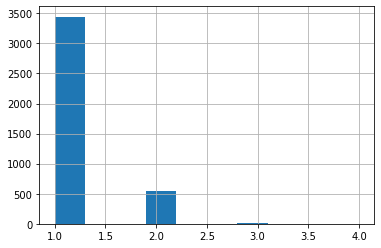

In [576]:
Xy['price'].hist()